<div style="display:block; margin-bottom:50px">
<h1 style="margin-bottom:25px; margin-top: 25px; font-size:3rem;color:#4c76ce;text-align:center;">
    Praktinis Projektas: Gapminder Duomenų Vizualizacija</h1>
    
<h2 style="margin-bottom: 25px;font-size:2.5rem;text-align:center;color:#8d1c1a;">
    3. Gapminder vizualizacija
    </h2>
       
<img src="https://raw.githubusercontent.com/lajmcourses/Images/master/bokeh.png"
     style="position:absolute;top:5px;left:25px;height:150px;width:auto;margin-bottom:35px;">
</div>

In [7]:
import numpy as np
import pandas as pd

from bokeh.io.export import export_png
from bokeh.layouts import layout
from bokeh.models import ColumnDataSource, Label
from bokeh.models import CustomJS, Slider
from bokeh.plotting import figure, output_notebook, show

from IPython.display import Image, display

output_notebook()

pd.options.display.precision = 2
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = 72
pd.options.display.max_rows = 100

# Set to False in order to enable plots interactivity
DISPLAY_PLOT_AS_IMAGE = True

Loading BokehJS ...

In [8]:
# Plot Settings

TITLE = "\nGapminder: The Third World Countries and the Western World\n"
YEAR_RANGE = range(1960, 2021)


start_year = min(YEAR_RANGE)
end_year = max(YEAR_RANGE)

In [9]:
# Gapminder visualization data

df_data = pd.read_csv("cleaned_data/cd_gapminder.csv")
df_data.head()


,Country Name,Country Code,Continent,Year,Fertility,Life Expectancy,Population,Circle Size,Circle Color
0,Afghanistan,AFG,Asia,1960,7.45,32.45,8996967,12.00,#e03c31
1,Afghanistan,AFG,Asia,1961,7.45,32.96,9169406,12.00,#e03c31
2,Afghanistan,AFG,Asia,1962,7.45,33.47,9351442,12.00,#e03c31
3,Afghanistan,AFG,Asia,1963,7.45,33.97,9543200,12.00,#e03c31
4,Afghanistan,AFG,Asia,1964,7.45,34.46,9744772,12.00,#e03c31


In [10]:
# Column Data Sources

source = ColumnDataSource(
    data=df_data
)

plot_source = ColumnDataSource(
    data=df_data[df_data["Year"]==start_year]
)

## Duomenų vizualizacija

In [11]:
# Tooltips

TOOLTIPS = [
    ("", "@{Country Name}: @{Life Expectancy} / @Fertility")
]

# Plot
plot_year = start_year
    
p = figure(height=650, width=900, x_range=(0.5, 8.5), y_range=(25, 95), tooltips=TOOLTIPS)
p.circle(
    x="Fertility",
    y="Life Expectancy",
    source = plot_source,
    size="Circle Size",
    line_color="gray",
    fill_color="Circle Color",
    alpha=0.65,
    legend_field="Continent"
)


# Title
p.title = TITLE
p.title.text_font_size = "25px"
p.title.text_font_style = "normal"

# Axis
p.xaxis.axis_label = "Children per woman (total fertility)"
p.xaxis.axis_label_text_font_size = "20px"
p.yaxis.axis_label = "Life expectancy (years)"
p.yaxis.axis_label_text_font_size = "20px"

# Year Label
year_label = Label(x=1.25, y=28, text=str(plot_year), x_units="data", y_units="data", 
                   text_font_size="70px", text_color="lightgray",
                   background_fill_color="white",
                   render_mode="css")

p.add_layout(year_label)

# Slider
year_slider = Slider(
                start=start_year, 
                end=end_year, 
                value=start_year, 
                step=1, 
                width=450,
                margin=(15, 15),
                title="Year")


sld_callback = CustomJS(args=dict(source=source, plot_source=plot_source, year_label=year_label),
                    code="""
                    const data = source.data;
                    const plot_data = plot_source.data;
                    
                    year_label.text = String(cb_obj.value);
                    
                    plot_data["Country Name"]=[],
                    plot_data["Country Code"]=[],
                    plot_data["Continent"]=[],
                    plot_data["Year"]=[],
                    plot_data["Fertility"]=[],
                    plot_data["Life Expectancy"]=[],
                    plot_data["Population"]=[],
                    plot_data["Circle Size"]=[],
                    plot_data["Circle Color"]=[]
                    
                    for (let i=0; i < data["Year"].length; i++){
                        if (data["Year"][i] == cb_obj.value) {
                            plot_data["Country Name"].push(data["Country Name"][i]);
                            plot_data["Country Code"].push(data["Country Code"][i]);
                            plot_data["Continent"].push(data["Continent"][i]);
                            plot_data["Year"].push(data["Year"][i]);
                            plot_data["Fertility"].push(data["Fertility"][i]);
                            plot_data["Life Expectancy"].push(data["Life Expectancy"][i]);
                            plot_data["Population"].push(data["Population"][i]);
                            plot_data["Circle Size"].push(data["Circle Size"][i]);
                            plot_data["Circle Color"].push(data["Circle Color"][i]);
                        }
                        
                    }
                    plot_source.change.emit();
                    

""")
year_slider.js_on_change("value", sld_callback);


# Plot layout
plot_layout = layout(
    [
        [p],
        [year_slider]
    ]
)

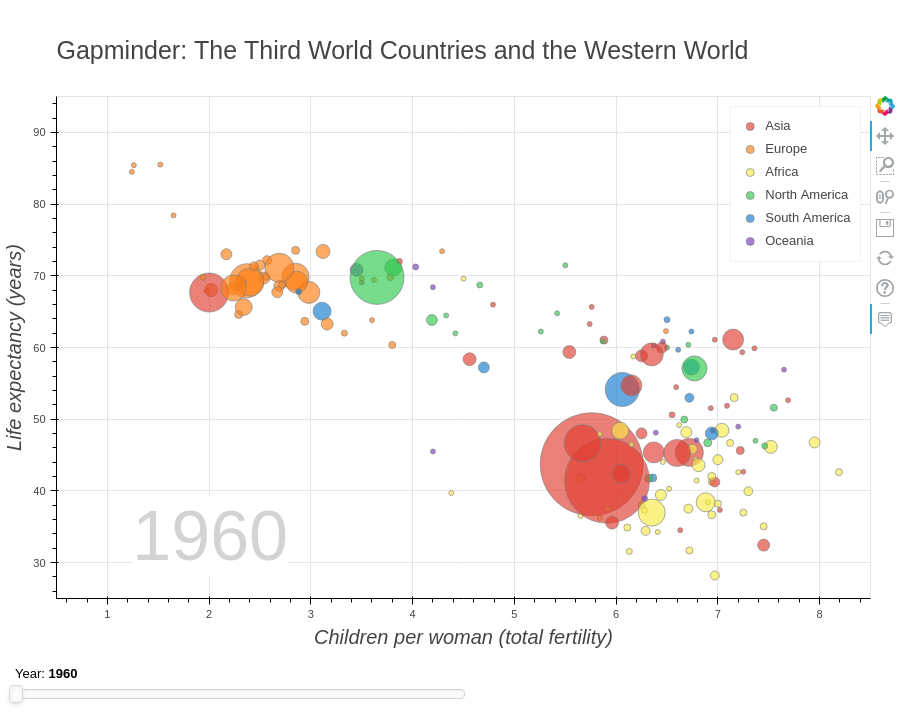

In [13]:
# Grafiko atvaizdavimas

if DISPLAY_PLOT_AS_IMAGE:
    # Export image file
    img = "plots/gapminder.png"
    img_file = export_png(plot_layout, filename=img)
    
    # Display image
    display(Image(filename=img))
else:
    show(plot_layout)